# Reproducible notebooks for text analytics

## Whoami 

- Research Software Engineer
- Part of the Research Computing team in Central IT
- Background in Python/R/data science with a sprinkle of NLP

<ul style="list-style: none; display: grid;grid-template-columns: 1fr 1fr;">
    <li>
<a href="https://arc.leeds.ac.uk"><img src="https://camo.githubusercontent.com/9629ee9d7f8e95d3717cba69dd0038be9111ccc33dd1429e33bcbc9e9756b8b3/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f4152434c656564732f6172636c656564732e6769746875622e696f2f6d61737465722f6173736574732f696d672f6c696768746572626c7565546578745f774c6f676f5f6d322e312e706e67" style="height: 50px;"></a></li>

<li><a href="https://github.com/ARCLeeds"><img src="https://cdn4.iconfinder.com/data/icons/iconsimple-logotypes/512/github-512.png" style="height: 50px;"></a></li>
    </ul>


## What are notebooks?



Notebooks are text documents composed of json that contain both code, markup text and other graphical elements (images, videos, plots, widgets).

Notebooks are composed of:

<ul>
    <li class="fragment fade-up">Code </li>
    <li class="fragment fade-up">Generated outputs </li>
    <li class="fragment fade-up">Metadata </li>
    <li class="fragment fade-up">Data </li>
 </ul>

### Jupyter notebooks

![](./text-analytics-talk-2023/jupyter-notebook.png)


### JupyterLab

![](./text-analytics-talk-2023/jupyterlab.png)

### Google Colab

![](./text-analytics-talk-2023/colab.png)

## Notebooks are great for text analytics
Example of text preprocessing for [topic modelling with consumer complaints data](https://github.com/ARCTraining/ittt-ai-ml-dl/blob/master/session_3_topicsML/session3_unsup_ML.ipynb).

In [3]:
%%bash 

if [ -d data/ ]; then
    echo "Data directory exists"
else
    mkdir data
fi

if test -f data/complaints.csv; then
    echo "Data file exists"
else 
    curl -LO http://files.consumerfinance.gov/ccdb/complaints.csv.zip; mv complaints.csv.zip data/ ;unzip data/complaints.csv.zip -d data/
fi

Data directory exists
Data file exists


In [5]:
# import the dataset
import pandas as pd

ticket_data = pd.read_csv('data/complaints.csv')

ticket_data.dropna(subset=["Consumer complaint narrative"], inplace=True)

print(ticket_data.shape)

ticket_data.head()

/tmp/ipykernel_9219/1604837686.py:4: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  ticket_data = pd.read_csv('data/complaints.csv')


(1158384, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
4,2022-12-29,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,I declare under penalty of perjury ( under the...,Company has responded to the consumer and the ...,"Convergent Resources, Inc.",HI,96818.0,Servicemember,Consent provided,Web,2022-12-29,Closed with explanation,Yes,NaN,6375521
10,2022-12-24,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I opened up a account online XXXX weeks ago an...,Company has responded to the consumer and the ...,BMO HARRIS BANK NATIONAL ASSOCIATION,AZ,85301.0,Servicemember,Consent provided,Web,2022-12-24,Closed with explanation,Yes,NaN,6358144
13,2022-12-16,Credit card or prepaid card,Store credit card,Fees or interest,Unexpected increase in interest rate,When signing up with the card they never tell ...,Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,NY,11421.0,NaN,Consent provided,Web,2022-12-16,Closed with explanation,Yes,NaN,6329064
15,2022-12-20,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,Received credit card statement dated XX/XX/22 ...,Company has responded to the consumer and the ...,U.S. BANCORP,OH,45377.0,NaN,Consent provided,Web,2022-12-20,Closed with non-monetary relief,Yes,NaN,6338237
17,2022-12-16,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,I reviewed my Consumer Reports and noticed tha...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,93727.0,NaN,Consent provided,Web,2022-12-16,Closed with explanation,Yes,NaN,6323220


In [7]:
import numpy as np
# a quick look at the average number of words in each complaint in each category
ticket_data.groupby('Product')['Consumer complaint narrative'].apply(lambda x: np.mean([len(word) for word in x]))

Product
Bank account or service                                                         1243.543769
Checking or savings account                                                     1326.154371
Consumer Loan                                                                   1109.715945
Credit card                                                                     1127.125438
Credit card or prepaid card                                                     1260.682314
Credit reporting                                                                 750.135087
Credit reporting, credit repair services, or other personal consumer reports     846.862221
Debt collection                                                                  957.419525
Money transfer, virtual currency, or money service                              1217.202314
Money transfers                                                                 1153.176353
Mortgage                                                                

In [9]:
ticket_data = ticket_data[ticket_data['Product'] == 'Credit card']

# lets peak and look what this looks like

ticket_data['Consumer complaint narrative'].iloc[:3].tolist()

['Last month I started receiving calls from unknown numbers. They did leave a voicemail to call a number back or log on to citicards.com and they could help me. I XXXX the numbers and there were multiple people suspecting the number of fraud. So I logged on to citicards.com and there were no alerts. I sent a secure message about the calls and they gave me this reply, " Dear XXXX, Thank you for contacting us. We appreciate each and every opportunity to serve you. \n\nOur records do not show that we have called you regarding your account. \n\nIf you think that the card information is at risk, please call Customer Service immediately. Once your closure request is processed, the current card is closed and a new card number is established. \nXXXX. \nIf there is any way we can be of further assistance, please feel free to contact us. \n\nSincerely, Account Specialist South Dakota \'\' So I assumed it was fraud, but the calls continued. I finally was able to answer XXXX and it said that it wa

## Preprocessing

In [10]:
from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, strip_numeric, remove_stopwords, strip_short, stem_text

def basic_preprocess(list_of_strings):
    """
    A basic function that takes a list of strings and runs some basic
    gensim preprocessing to tokenise each string.
    
    Operations:
        - convert to lowercase
        - remove html tags
        - remove punctuation
        - remove numbers
        - remove short tokens (less than 3 characters)
    
    Outputs a list of lists
    """
    
    CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, strip_punctuation, strip_numeric, remove_stopwords, strip_short]

    preproc_text = [preprocess_string(doc, CUSTOM_FILTERS) for doc in list_of_strings]
    
    return preproc_text

In [11]:
import re

def remove_twitterisms(list_of_strings):
    """
    Some regular expression statements to remove twitter-isms
    
    Operations:
        - remove links
        - remove @tag
        - remove #tag
        
    Returns list of strings with the above removed
    """
    
    # removing some standard twitter-isms

    list_of_strings = [re.sub(r"http\S+", "", doc) for doc in list_of_strings]

    list_of_strings = [re.sub(r"@\S+", "", doc) for doc in list_of_strings]

    list_of_strings = [re.sub(r"#\S+", "", doc) for doc in list_of_strings]
    
    return list_of_strings

In [12]:
# removing emojis
# taken from https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b#gistcomment-3315605

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [13]:
def remove_redacted(string):
    
    string = [re.sub(r"(x|X){2,}", "", doc) for doc in string]
    
    return string

In [14]:
from gensim.models.phrases import Phrases

def n_gram(tokens):
    """Identifies common two/three word phrases using gensim module."""
    # Add bigrams and trigrams to docs (only ones that appear 10 times or more).
    # includes threshold kwarg (threshold score required by bigram)
    bigram = Phrases(tokens, min_count=10, threshold=100)
    trigram = Phrases(bigram[tokens], threshold = 100)

    for idx, val in enumerate(tokens):
        for token in bigram[tokens[idx]]:
            if '_' in token:
                if token not in tokens[idx]:
                    # Token is a bigram, add to document.bigram
                    tokens[idx].append(token)
        for token in trigram[tokens[idx]]:
            if '_' in token:
                if token not in tokens[idx]:
                    # Token is a trigram, add to document.
                    tokens[idx].append(token)
    return tokens

In [15]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatise(words):
    """
    Convert words to their lemma or root using WordNet lemmatizer
    """
    lemma = WordNetLemmatizer()
    # this function takes a list of lists of tokens
    return [[lemma.lemmatize(token,'v') for token in tokens] for tokens in words]

[nltk_data] Downloading package wordnet to /home/medacola/nltk_data...


In [16]:
# lets slice out the text data from our dataframe
subsample_text = ticket_data['Consumer complaint narrative'].tolist()

In [17]:
# next we implement the preprocessing functions on our data

preprocessed_corpus = remove_twitterisms(subsample_text)

preprocessed_corpus = remove_redacted(preprocessed_corpus)

preprocessed_corpus = [remove_emoji(doc) for doc in preprocessed_corpus]

preprocessed_corpus = basic_preprocess(preprocessed_corpus)

preprocessed_corpus = lemmatise(preprocessed_corpus)

In [20]:
# lets compare the original strings to the preprocessed strings

print(subsample_text[0])
print("-------------------------")
print(preprocessed_corpus[0])

Last month I started receiving calls from unknown numbers. They did leave a voicemail to call a number back or log on to citicards.com and they could help me. I XXXX the numbers and there were multiple people suspecting the number of fraud. So I logged on to citicards.com and there were no alerts. I sent a secure message about the calls and they gave me this reply, " Dear XXXX, Thank you for contacting us. We appreciate each and every opportunity to serve you. 

Our records do not show that we have called you regarding your account. 

If you think that the card information is at risk, please call Customer Service immediately. Once your closure request is processed, the current card is closed and a new card number is established. 
XXXX. 
If there is any way we can be of further assistance, please feel free to contact us. 

Sincerely, Account Specialist South Dakota '' So I assumed it was fraud, but the calls continued. I finally was able to answer XXXX and it said that it was a citicard

In [22]:
print(subsample_text[2])
print("-------------------------")
print(preprocessed_corpus[2])

I once had a credit card with Fifth Third bank, which was closed bank in XX/XX/XXXX. In XX/XX/XXXX a charge that was stored on an online account automatically tried charging the card for the renewed subscription. Instead of Fifth Third bank declining the transaction they reopened my closed credit card without my permission. Finally, after three months of not contacting me via phone, email, or mail, I received a letter in the mail saying I owed the charge of {$77.00} ( for the service ) and an extra {$100.00} for late fees. After countless hours on the phone with them, they acknowledged my credit card was closed and they reopened it. I offered to pay the initial {$77.00} fee if they would waive the late fee for not informing me, or without reopening it without my permission. They said they would look into the dispute into a better solution. After about another month they sent back a letter saying the dispute was denied and I owed the entire fee. When I called back to ask how it could ha

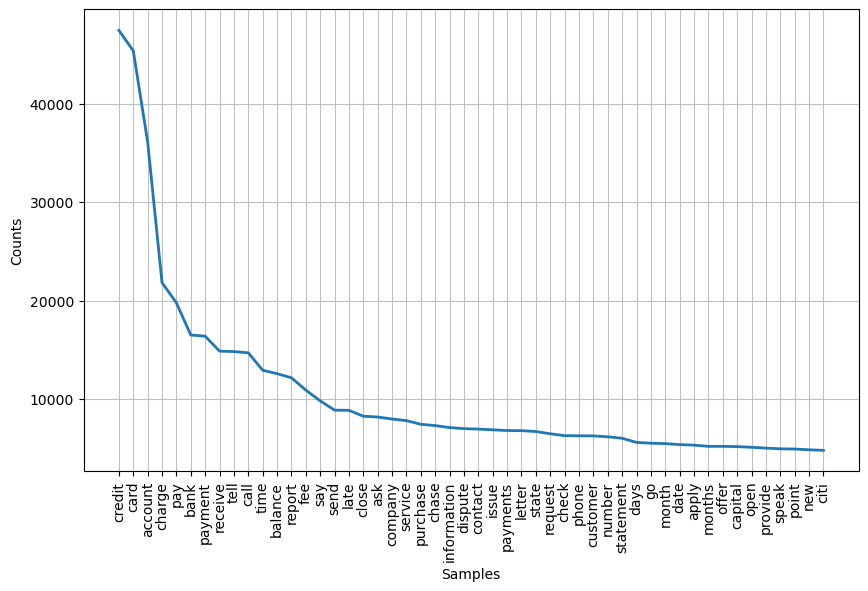

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [26]:
import nltk
import matplotlib.pyplot as plt
flat_list = [item for sublist in preprocessed_corpus for item in sublist]
text = nltk.Text(flat_list)
fdist = nltk.FreqDist(text)
plt.figure(figsize=(10,6))
fdist.plot(50)

## But notebooks can be hard to reproduce

In [37]:
def sum(x): return x + x

In [38]:
xx = sum(2)

In [39]:
xx = sum(4)

In [40]:
xx == 4

False

## Importing from other notebooks

## Not sharing data with notebooks

## But there are steps you can take to improve reproducibility

## Binder/ repo2Docker

## Julynter

## Know when to use notebooks v writing a library